<a href="https://colab.research.google.com/github/rikowijayanto/data_science/blob/master/1906458142_Riko_Wijayanto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**`Tugas Lab SNA - Riko Wijayanto - 1906458142`**

#Open Data

In [1]:
#import data
import json
import csv
import sys
import tweepy
import pandas as pd
import string

In [2]:
#Load data tweet untuk mengambil pasangan id pengguna yang berinteraksi dengan membalas tweet
tws=[]
for l in open('Data_Tweets_10.json'): #hit drive data uploaded/ data disimpan dalam memory sementara collab
    tw = json.loads(l)
    if(tw["in_reply_to_user_id"] is not None):
      #menghitung jumlah kata dalam satu tweet
        jumlah_kata = sum([i.strip(string.punctuation).isalpha() for i in tw["full_text"].split()])
        tws.append([tw["user"]["id"],tw["in_reply_to_user_id"], tw["user"]["screen_name"], tw["in_reply_to_screen_name"],tw["user"]["name"], tw["user"]["location"], 
                    tw["user"]["followers_count"], tw["user"]["friends_count"], jumlah_kata])

In [4]:
len(tws)

923

In [39]:
tws[:4]

[[935314238096019456,
  94805910,
  'benhur90210',
  'addiems',
  'benhur',
  '',
  17,
  130,
  1],
 [1008658718542553088,
  765149955396734976,
  'chosaurus',
  'VICE_ID',
  'Tukang Cat',
  'perempatan milky way',
  6,
  133,
  4],
 [1270688425230823425,
  1237067384613044225,
  'JhonaMerah',
  'ChechepSoepria2',
  'Jhona muhamad indra',
  '',
  527,
  1384,
  19],
 [1206254205024911361,
  421851399,
  'Divine_powerr',
  'sugengman',
  'Legendaddy',
  'Tangerang, Indonesia',
  28,
  81,
  16]]

In [300]:
#Manipulasi dan request ke API twitter
#Get followers count dan friends count dari Twitter API
consumer_key = 'Iy2oKpT4vodsPACJQO9DM5lrN'
consumer_secret = 'bdZnrRKaL8DrjrnGYxUuNZ3jKJYddWlgGBAJiJIaFzjRqWTJ0B'
access_token = '244745656-uk7WWtanyh2W1CaTMRQmleQdTPKTzyyAgRXlOBzR'
access_token_secret = 'AkwQF8Vdzu4ZFihm6Aw2elHjnE55fDBV4HlXWjMqoKtLc'

auth=tweepy.AppAuthHandler(consumer_key, consumer_secret)

api=tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# Deklarasi Node dan Edge

In [ ]:
#menggabungkan id pengguna yang berinteraksi ke dalam sebuah list
nodes=[]
users=[]

for t in tws:
    if(t[0] not in nodes):
        nodes.append(t[0])
        users.append([t[0],t[2], t[4], t[5], t[6], t[7]]) #isi dari nodes
    if(t[1] not in nodes):

      #get value dari temporary memory  ====> NOTE: get response API untuk user yg not found then try to catch untuk diparsing
      try:
        name = api.get_user(t[1]).name
        lokasi = api.get_user(t[1]).location
        jumlah_fol = api.get_user(t[1]).followers_count
        jumlah_friend = api.get_user(t[1]).friends_count
      except:
        name = t[3]
        lokasi = " "
        jumlah_fol = 0
        jumlah_friend = 0
        
      #simpan ke file
      nodes.append(t[1])
      users.append([t[1],t[3], name, lokasi, jumlah_fol, jumlah_friend])

data_edge = []
for t in tws:
  if(t[0] not in data_edge):
    data_edge.append([t[0], t[1], t[8]]) #berisi user id yang membalas tweet, user id yang tweetnya dibalas, dan jumlah kata dari tweet balasan tersebut 


Rate limit reached. Sleeping for: 865
Rate limit reached. Sleeping for: 806
Rate limit reached. Sleeping for: 702
Rate limit reached. Sleeping for: 494


In [221]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [246]:
#menyiapkan file csv yang akan di gunakan untuk menampung data nodes
csvNode = open('/content/gdrive/MyDrive/Master/Semester 2/Media Social Analytics/Tugas Lab SNA/komisaristelkom-node-list.csv', 'a', newline='')
nodeWriter = csv.writer(csvNode)


In [247]:
#menulis data user kedalam file csv
for user in users:
  nodeWriter.writerow(user)
csvNode.close()

In [248]:
#menyiapkan file csv untuk menampung data edge
csvEdge = open('/content/gdrive/MyDrive/Master/Semester 2/Media Social Analytics/Tugas Lab SNA/komisaristelkom-edge-list.csv', 'a', newline='')
edgeWriter = csv.writer(csvEdge)

In [249]:
#menulis data egekedalam file csv
for t in data_edge:
  edgeWriter.writerow(t)
csvEdge.close()

# Pembuatan Graph Network

In [183]:
import networkx as nx
from operator import itemgetter
import csv
from networkx.algorithms import community

In [250]:
#membaca file node list
with open('/content/gdrive/MyDrive/Master/Semester 2/Media Social Analytics/Tugas Lab SNA/komisaristelkom-node-list.csv', 'r') as nodecsv: # Buka file csv
  nodereader = csv.reader(nodecsv) # membaca file csv
  nodes = [n for n in nodereader if len(n)>0] #memastikan hanya baris yang adaisinya yang diambil

  node_ids = [n[0]  for n in nodes] # menyiapkan list yang berisi id pengguna

In [251]:
nodes

[['935314238096019456', 'benhur90210', 'benhur', '', '17', '130'],
 ['94805910', 'addiems'],
 ['1008658718542553088',
  'chosaurus',
  'Tukang Cat',
  'perempatan milky way',
  '6',
  '133'],
 ['765149955396734976', 'VICE_ID'],
 ['1270688425230823425',
  'JhonaMerah',
  'Jhona muhamad indra',
  '',
  '527',
  '1384'],
 ['1237067384613044225', 'ChechepSoepria2'],
 ['1206254205024911361',
  'Divine_powerr',
  'Legendaddy',
  'Tangerang, Indonesia',
  '28',
  '81'],
 ['421851399', 'sugengman'],
 ['1375139356793466887', 'SMoempoeni', 'Satrio Moempoeni', '', '3', '13'],
 ['1117990249806721024', 'msaid_didu'],
 ['3238948560', 'abas_jo', 'joAg', 'jakarta', '64', '308'],
 ['55507370', 'tvOneNews'],
 ['576986732',
  'trinovitaindah',
  'Sayang~',
  'Kota Palembang, Sumatera Selat',
  '59',
  '88'],
 ['1353364987939409920', 'taktekbum'],
 ['393345689', 'caeogud', 'cae', 'Bandar Lampung, Lampung', '1139', '812'],
 ['151804263',
  'puturudy',
  'Putu RUDY Setiawan',
  'Surabaya, Indonesia',
  '102

In [252]:
#membaca file edge list
with open('/content/gdrive/MyDrive/Master/Semester 2/Media Social Analytics/Tugas Lab SNA/komisaristelkom-edge-list.csv', 'r') as edgecsv: # buka file csv
  edgereader = csv.reader(edgecsv) # membaca file csv
  rows = [[row[0],row[1], row[2]] for row in edgereader if len(row)>0] #memastikan hanya baris yang adaisinya yang diambil
  edges =[tuple(e) for e in rows]

In [253]:
G = nx.DiGraph() #membuat objek graph
G.add_nodes_from(node_ids) #menambahkan node ke dalam graph
for e in edges:
    G.add_edge(e[0],e[1],weight=int(e[2])) #menambahkan userid asal, userid tujuan, bobot

In [230]:
G

In [231]:
len(edges)

1846

In [232]:
nodes

[['935314238096019456', 'benhur90210', 'benhur', '', '17', '130'],
 ['1008658718542553088',
  'chosaurus',
  'Tukang Cat',
  'perempatan milky way',
  '6',
  '133'],
 ['1270688425230823425',
  'JhonaMerah',
  'Jhona muhamad indra',
  '',
  '527',
  '1384'],
 ['1206254205024911361',
  'Divine_powerr',
  'Legendaddy',
  'Tangerang, Indonesia',
  '28',
  '81'],
 ['1375139356793466887', 'SMoempoeni', 'Satrio Moempoeni', '', '3', '13'],
 ['3238948560', 'abas_jo', 'joAg', 'jakarta', '64', '308'],
 ['576986732',
  'trinovitaindah',
  'Sayang~',
  'Kota Palembang, Sumatera Selat',
  '59',
  '88'],
 ['393345689', 'caeogud', 'cae', 'Bandar Lampung, Lampung', '1139', '812'],
 ['151804263',
  'puturudy',
  'Putu RUDY Setiawan',
  'Surabaya, Indonesia',
  '1029',
  '908'],
 ['1204835732742791169',
  'iyatomaradeka',
  'ADIL',
  'DKI Jakarta, Indonesia',
  '0',
  '83'],
 ['1101443158917885952', 'RahmatPutraS2', 'Amir Al-Dzill🇵🇸', '', '23', '90'],
 ['435197649', 'HayabusaWarrior', 'Hayabusa 🇵🇸', '', 

In [283]:
#membuat dictionary untuk user name twitter
screen_name_dict = {}
jumlah_followers_dict = {}
list_foll = []   #inisiasi list bagi userid yang kosong
for node in nodes:
  screen_name_dict[node[0]] = node[1]
  if len(node) > 2:
    jumlah_followers_dict[node[0]] = node[4]
  else:
    list_foll.append(node[0])

In [284]:
list_foll

['94805910',
 '765149955396734976',
 '1237067384613044225',
 '421851399',
 '1117990249806721024',
 '55507370',
 '1353364987939409920',
 '1331253608512323590',
 '1304600953899814912',
 '1215316458042843136',
 '305935546',
 '1144936897812168705',
 '1253175030260723713',
 '992488238609678336',
 '717546199',
 '63421902',
 '1250780684823588864',
 '744314137',
 '761395437001510912',
 '791235291193352192',
 '1301072439594512384',
 '1109834577336365058',
 '4780649298',
 '1383808773102264323',
 '1211153840122155008',
 '1016528521705881600',
 '82295689',
 '19190361',
 '501597144',
 '1148867699394506752',
 '1029198279756541952',
 '907897495044317185',
 '71436318',
 '3812444419',
 '50682651',
 '30201110',
 '1258028640958156800',
 '452992293',
 '99705510',
 '102215394',
 '1303591300290080768',
 '219548433',
 '70168972',
 '1336227600159580160',
 '1943133078',
 '1199634031697989633',
 '1040306964100669440',
 '60406679',
 '1292587300770025472',
 '946180110901579776',
 '1246005535523999745',
 '13534494

In [297]:
friend_count

'Riko Wijayanto'

In [235]:
screen_name_dict

{'935314238096019456': 'benhur90210',
 '1008658718542553088': 'chosaurus',
 '1270688425230823425': 'JhonaMerah',
 '1206254205024911361': 'Divine_powerr',
 '1375139356793466887': 'SMoempoeni',
 '3238948560': 'abas_jo',
 '576986732': 'trinovitaindah',
 '393345689': 'caeogud',
 '151804263': 'puturudy',
 '1204835732742791169': 'iyatomaradeka',
 '1101443158917885952': 'RahmatPutraS2',
 '435197649': 'HayabusaWarrior',
 '1182529281173311488': 'immuezza',
 '1316739736237568000': 'Andi64024015',
 '383512437': 'arift___',
 '416584075': 'dhanyapri',
 '971895945318182912': 'Ronal_Trimayudi',
 '837442506': 'agung7cantona',
 '1243552470216802304': 'Dacop_',
 '884174839': 'Teofilusjoko',
 '2408787680': 'kangjo2014',
 '1078096892263710720': 'jacxtic',
 '376642170': 'nainggolan1818',
 '321224380': 'Faqih_Aul',
 '241355440': '4n0m1',
 '2542809632': 'PMID_BogorTimur',
 '1254364681805807616': 'LawanC19',
 '1362809538026512389': 'PNrool',
 '98665564': 'date13xx',
 '1350292715074772992': 'Cevron4',
 '133804

In [263]:
jumlah_followers_dict

{'100093681': '498',
 '1004402627264692224': '106',
 '100699652': '885',
 '1007504707038789632': '27',
 '1007699773040648192': '221',
 '1008658718542553088': '6',
 '100902049': '442',
 '101216002': '1138',
 '1012324503588782082': '230',
 '101517346': '606',
 '1027547627338981377': '145',
 '1028284975152390144': '160',
 '1029249483471642625': '2258',
 '1029950844': '2504',
 '1031163657160286208': '7754',
 '1032632715391074309': '50',
 '1034627938602209280': '1505',
 '104165624': '229',
 '1043194299335102465': '945',
 '1043433267444178945': '85',
 '1044162663234777088': '26',
 '104507028': '211',
 '1045453334386098176': '56',
 '1045844556317507584': '100',
 '1047533809162317824': '108',
 '1047610279763238912': '521',
 '1047679190869336064': '2376',
 '1049096399206285312': '86',
 '1049711295799296001': '2711',
 '1051136542553518080': '157',
 '1052843220877471745': '21',
 '1054287747429486593': '1804',
 '1054620402540924929': '23',
 '1057988566003855365': '481',
 '106038823': '298',
 '1060

In [264]:
#menambahkan attribute kedalam graph node
nx.set_node_attributes(G, screen_name_dict, 'nama_twitter')
nx.set_node_attributes(G, jumlah_followers_dict, 'jumlah_followers')

# Informasi Umum Graf

In [265]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 1096
Number of edges: 888
Average in degree:   0.8102
Average out degree:   0.8102


# Perhitungan Indegree, Outdegree, Betwenness

In [266]:
#menghitung
indegree_dict = dict(G.in_degree(G.nodes(), weight='weight'))#indegree
outdegree_dict = dict(G.out_degree(G.nodes(), weight='weight')) #outdegree
betweenness_dict = nx.betweenness_centrality(G,weight='weight') #betweeness

#menyimpan kedalam attribute
nx.set_node_attributes(G, indegree_dict, 'indegree')
nx.set_node_attributes(G, outdegree_dict, 'outdegree')
nx.set_node_attributes(G, betweenness_dict, 'betweenness')

In [267]:
indegree_dict

{'935314238096019456': 0,
 '94805910': 58,
 '1008658718542553088': 0,
 '765149955396734976': 8,
 '1270688425230823425': 0,
 '1237067384613044225': 19,
 '1206254205024911361': 0,
 '421851399': 16,
 '1375139356793466887': 0,
 '1117990249806721024': 1107,
 '3238948560': 0,
 '55507370': 5,
 '576986732': 0,
 '1353364987939409920': 10,
 '393345689': 21,
 '151804263': 0,
 '1331253608512323590': 72,
 '1204835732742791169': 0,
 '1101443158917885952': 0,
 '1304600953899814912': 52,
 '435197649': 0,
 '1215316458042843136': 31,
 '1182529281173311488': 29,
 '1316739736237568000': 0,
 '305935546': 51,
 '383512437': 0,
 '1144936897812168705': 4,
 '416584075': 0,
 '1253175030260723713': 5,
 '971895945318182912': 0,
 '992488238609678336': 16,
 '837442506': 0,
 '1243552470216802304': 0,
 '717546199': 8,
 '884174839': 0,
 '63421902': 6,
 '2408787680': 0,
 '1250780684823588864': 81,
 '1078096892263710720': 0,
 '744314137': 62,
 '376642170': 0,
 '321224380': 22,
 '241355440': 38,
 '2542809632': 0,
 '761395

In [268]:
dictlist = []
for key, value in indegree_dict.items():
    temp = [key,value]
    dictlist.append(temp)
  
import pandas as pd
df=pd.DataFrame(dictlist,columns=['userid', 'indegree score'])
df

,userid,indegree score
0,935314238096019456,0
1,94805910,58
2,1008658718542553088,0
3,765149955396734976,8
4,1270688425230823425,0
...,...,...
1091,1234370998675197956,0
1092,212146819,9
1093,2171680488,0
1094,2777551608,0


In [270]:
sorted_indegree = sorted(indegree_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by indegree centrality:")
for d in sorted_indegree[:20]:
  print(d[0],"|",G.nodes[d[0]]['nama_twitter'],"|", d[1])

Top 20 nodes by indegree centrality:
1117990249806721024 | msaid_didu | 1107
4780649298 | Dennysiregar7 | 676
69183155 | detikcom | 653
17128975 | CNNIndonesia | 631
3319260420 | geloraco | 321
829366551446818816 | asumsico | 287
18129942 | tempodotco | 194
43922847 | ridwanhr | 185
41730943 | VIVAcoid | 180
23343960 | kompascom | 170
1239754822707904513 | BossTemlen | 167
1248803440710406145 | dapitnih | 155
143698155 | ditamoechtar_ | 151
770128892 | bintangemon | 150
243880064 | NovalAssegaf | 146
30201110 | alisyarief | 142
719725925215170561 | marlina_idha | 134
1289954556411969537 | Ndons_Back | 132
1266163382807224320 | FerdinandHaean3 | 130
27839691 | AbdeeNegara | 129


In [272]:
sorted_outdegree = sorted(outdegree_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by outdegree centrality:")
for d in sorted_outdegree[:20]:
    print(d[0],"|",G.nodes[d[0]]['nama_twitter'],"|",G.nodes[d[0]]['jumlah_followers'],"|", d[1])


Top 20 nodes by outdegree centrality:
307790713 | rainrainb0w | 134 | 2026
324179296 | wahyudhie3 | 142 | 108
1375139356793466887 | SMoempoeni | 3 | 97
1254364681805807616 | LawanC19 | 266 | 93
1118797033895157766 | ErlynPejuang | 10 | 83
451181756 | ZunHafizAedilus | 29 | 83
857257753 | busetdah78 | 10 | 78
808838705192415232 | yakobus81406404 | 9 | 75
1109669267639697408 | AiraAfniAmalia | 7216 | 75
1319907631188770817 | Budayaindonesi8 | 0 | 72
1205929509184106496 | MasihHidupAku | 24 | 69
634159957 | sayfull46 | 451 | 66
792453179342323712 | HoegengMoel | 54 | 64
1376230200 | parlandungan | 736 | 62
882052290303082498 | INDOTEKH | 433 | 58
891675935887339520 | indrasugiarto19 | 34 | 58
1275095191418855425 | BaronSijagur | 20 | 52
4503288793 | fallah_said | 257 | 52
1354888390253056001 | KampretLiz | 0 | 51
726984904680964096 | AkbarWasito | 51 | 50


In [275]:
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweeness centrality:")
for d in sorted_betweenness[:20]:
    print(d[0],"|",G.nodes[d[0]]['nama_twitter'],"|", d[1])

Top 20 nodes by betweeness centrality:
1239754822707904513 | BossTemlen | 6.678186538445485e-06
1289954556411969537 | Ndons_Back | 5.8434132211398e-06
1231495733523566592 | txtdrpemerintah | 4.173866586528428e-06
1241100157870944256 | FKadrun | 2.504319951917057e-06
1383808773102264323 | DeddyKusdedi3 | 1.6695466346113713e-06
1353449413885087744 | Djoked2 | 1.6695466346113713e-06
1236300856254853120 | RamdaniGuruh | 8.347733173056856e-07
100902049 | maulana050317 | 8.347733173056856e-07
1371135022871183365 | AdityaChristy2 | 8.347733173056856e-07
859359474 | JhonniSinaga20 | 8.347733173056856e-07
1211550743469019137 | KAPITANBESAR | 8.347733173056856e-07
1224642373457600513 | MDjoelies | 8.347733173056856e-07
1327577862325428225 | Novifauzan2 | 8.347733173056856e-07
1312514755 | DonAdam68 | 8.347733173056856e-07
1374357956108685317 | presiden_sarden | 8.347733173056856e-07
453795871 | dityaprtma | 8.347733173056856e-07
1379044492464943104 | HibisOdnielSabd | 8.347733173056856e-07
77665

# Visualisasi dan Export Graf

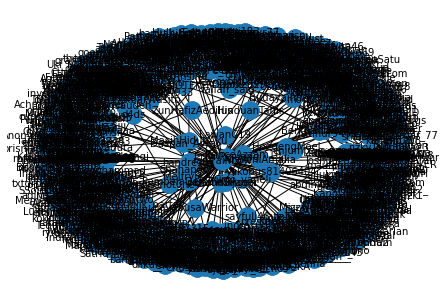

In [276]:
#Visualisasi graph
#import komponen matplotlib
from matplotlib import pyplot as plt

#visualisasi graph dengan matplotlib
pos = nx.spring_layout(G)
nx.draw(G, pos)
node_sizes = []
labels = []
nodeList = G.nodes        

nx.draw_networkx_nodes(G, pos)
node_labels = nx.get_node_attributes(G,'nama_twitter')
nx.draw_networkx_labels(G, pos, labels = node_labels, font_size=10)

plt.show()

In [277]:
#export graph
nx.write_gexf(G, 'komisaris-telkom-riko.gexf')

In [278]:
#export graph to drive
nx.write_gexf(G, '/content/gdrive/MyDrive/Master/Semester 2/Media Social Analytics/Tugas Lab SNA/komisaris-telkom-riko.gexf')

# Community Detection

In [279]:
#community detection
komunitas = community.girvan_newman(G)
next_komunitas = next(komunitas)

In [280]:
ls_kom = sorted(map(sorted, next_komunitas))
len(ls_kom)

283

In [281]:
#link prediction dengan jaccard coefficient
jc_linkpreds = nx.jaccard_coefficient(G.to_undirected())
links = [((u, v), p) for u, v, p in jc_linkpreds if(p>0.7)]

In [282]:
print(links[:10])

[(('560343682', '3000505602'), 1.0), (('560343682', '1268415775640924160'), 1.0), (('560343682', '614916985'), 1.0), (('560343682', '46651600'), 1.0), (('560343682', '295999626'), 1.0), (('560343682', '252150699'), 1.0), (('560343682', '279312062'), 1.0), (('560343682', '488139033'), 1.0), (('560343682', '1108352558'), 1.0), (('560343682', '760467425271787521'), 1.0)]
